In [1]:
#loading neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
data=pd.read_csv('C:/Users/Mohan/Downloads/titanic_dataset (1).csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- PassengerId: Unique Id of a passenger
- Survived: If passenger survied (0-No, 1-Yes)
- Pclass: Passenger Class (1=1st, 2=2nd, 3=3rd)
- Name: Name of passenger
- Sex: Male/Female
- Age: Age of Passenger
- SibSp: No.of siblings/spouses aboard
- Parch: No.of parents/children abroad
- Ticket: Ticket number
- Fare: PAssenger Fare
- Cabin: Cabin number
- Embarked: Port of Embarkation(C=Cherbourg, Q=Queenstown, S=Southampton)

In [8]:
data.Survived.value_counts()      #Inbalanced dataset

0    549
1    342
Name: Survived, dtype: int64

# EDA

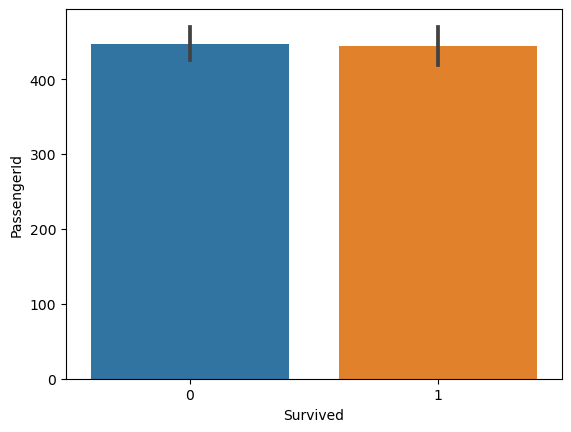

In [9]:
sns.barplot(x = 'Survived', y = 'PassengerId', data = data)
plt.show()

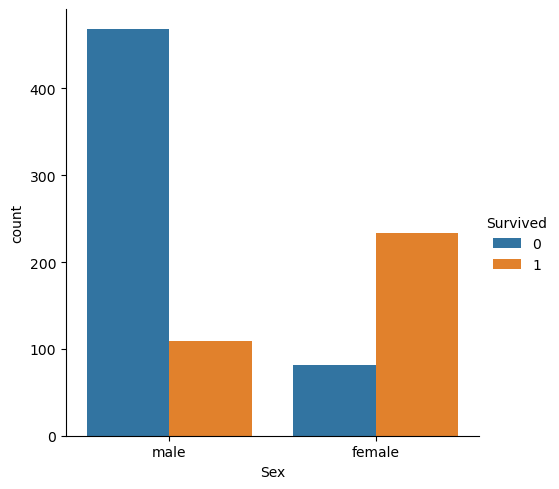

In [10]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = data)

##### The survival rate of women is greater than that of men 

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

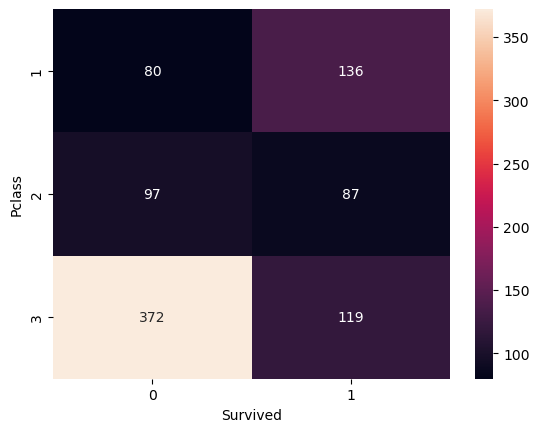

In [11]:
# Group the dataset by Pclass and Survived and then unstack them
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

##### Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

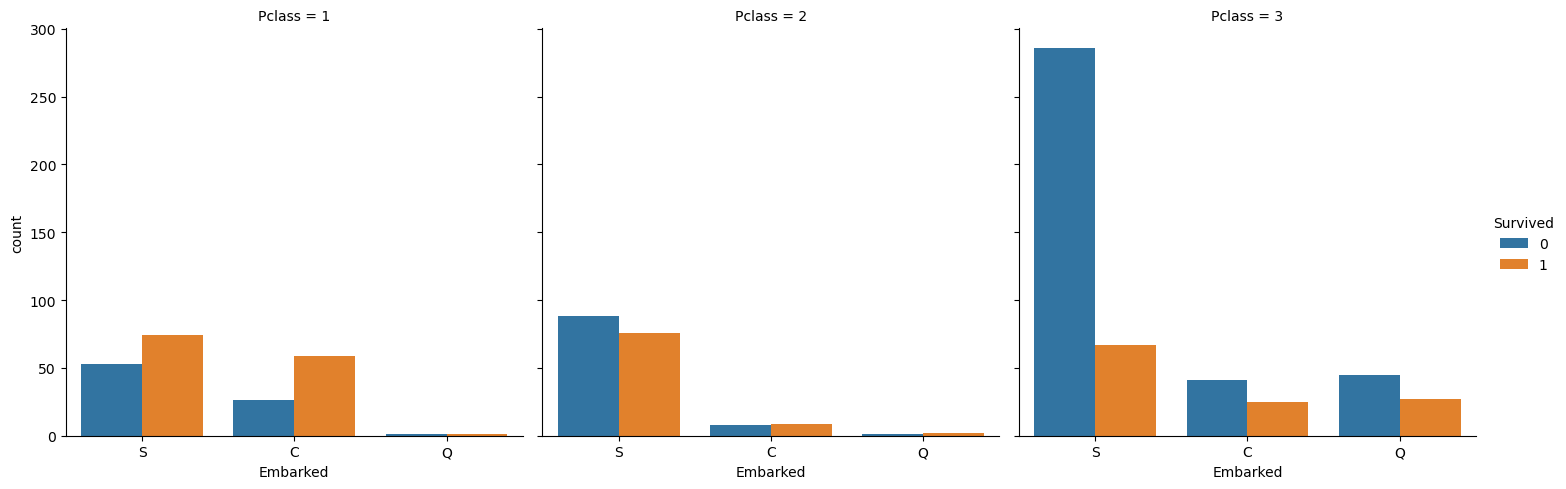

In [12]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = data)

##### Majority of the passengers boarded from S. So, the missing values can be filled with S.

## Pre-processing

In [13]:
#checking for missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#checking for unique no.of values
data['Name'].nunique(),data['Embarked'].nunique()

(891, 3)

In [15]:
data['Cabin'].nunique(),data['Ticket'].nunique()

(147, 681)

## Insights

- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- 'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

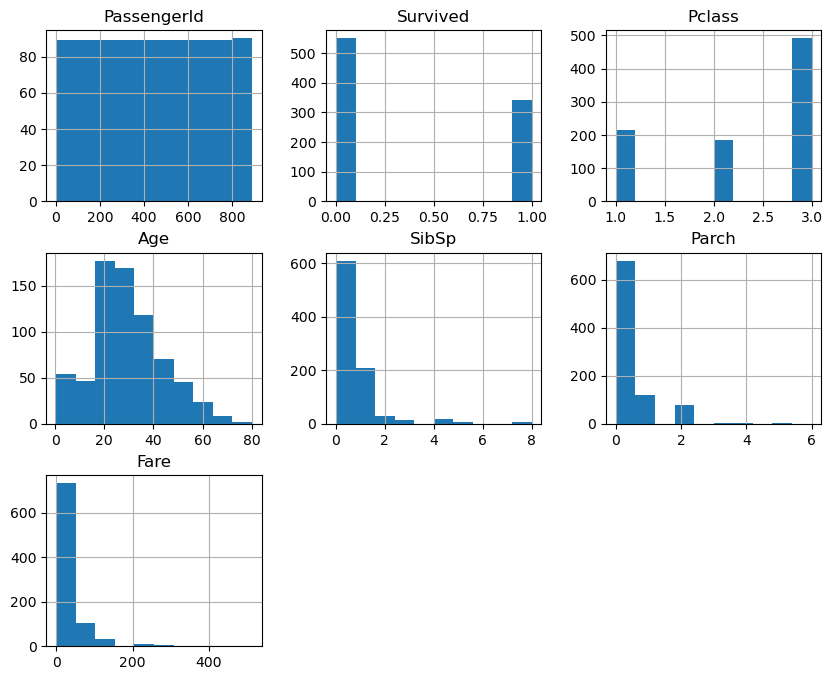

In [16]:
data.hist(figsize=(10,8))

In [17]:
#filling missing values in col 'Age' with median
data['Age']=data['Age'].fillna(data['Age'].median())

In [18]:
data['Embarked'].mode()    #since categorical

0    S
Name: Embarked, dtype: object

In [19]:
#filling missing values in col 'Embarked' with mode since its categorical
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [20]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
# Adding a column Family_Size
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']

### Remove unnecessary columns

In [22]:
data = data.drop(columns=['Ticket', 'PassengerId', 'Cabin', 'Name'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


### Map 'Sex' and 'Embarked' to numerical values

In [23]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,0,22.0,1,0,7.2500,2,1
1,1,1,1,38.0,1,0,71.2833,0,1
2,1,3,1,26.0,0,0,7.9250,2,0
3,1,1,1,35.0,1,0,53.1000,2,1
4,0,3,0,35.0,0,0,8.0500,2,0


In [25]:
corr = data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.065997
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,-0.108262,0.200988
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.245619
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,0.890712
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.783111
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,-0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.066516
Family_Size,0.016639,0.065997,0.200988,-0.245619,0.890712,0.783111,0.217138,0.066516,1.000000


<AxesSubplot:>

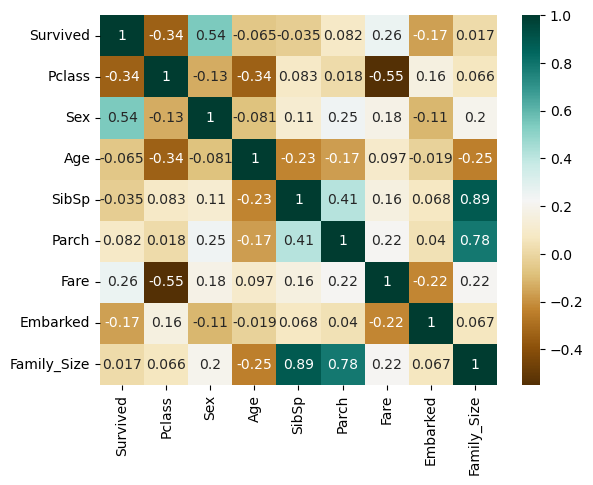

In [26]:
sns.heatmap(data = corr,cmap='BrBG', annot=True)

##### There are no very highly correlated columns.

In [27]:
x=data.drop('Survived',axis=1)
y=data['Survived']

### Hold-out Technique

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression          #logistic regression model
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
print('Confusion matrix is:\n',confusion_matrix(y_test,y_pred))

Confusion matrix is:
 [[90 15]
 [19 55]]


In [33]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.8100558659217877


# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

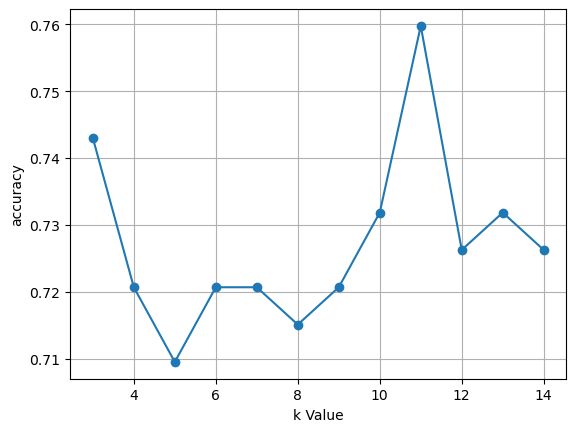

In [35]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [36]:
knn = KNeighborsClassifier(n_neighbors=11)             #accuracy of a model with k=11
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7597765363128491

In [37]:
confusion_matrix(y_test,y_pred)
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.7597765363128491


## Support Vector Machine

In [38]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [39]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.7821229050279329


## K-Fold Cross validation

In [40]:
from sklearn.model_selection import KFold

In [41]:
kfold_validator = KFold(10)

In [42]:
for train_index, test_index in kfold_validator.split(x,y):
    print('Training Index:', train_index)
    print('Test Index:', test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
# Logistic Regression
cv_result = cross_val_score(lr_model, x, y, cv=kfold_validator)
cv_result

array([0.78888889, 0.80898876, 0.7752809 , 0.7752809 , 0.78651685,
       0.76404494, 0.76404494, 0.7752809 , 0.84269663, 0.84269663])

In [45]:
np.mean(cv_result)

0.7923720349563046

In [46]:
# KNN
cv_result = cross_val_score(knn, x, y, cv=kfold_validator)
cv_result

array([0.61111111, 0.66292135, 0.68539326, 0.6741573 , 0.65168539,
       0.76404494, 0.73033708, 0.70786517, 0.79775281, 0.76404494])

In [47]:
np.mean(cv_result)

0.7049313358302122

In [48]:
# SVC
cv_result = cross_val_score(svc, x, y, cv=kfold_validator)
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [49]:
np.mean(cv_result)

0.786729088639201

## Stratified K-Fold Cross validation

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
skfold_validator = StratifiedKFold(n_splits=10)

In [52]:
for train_index, test_index in skfold_validator.split(x,y):
    print('Training Index:', train_index)
    print('Test Index:', test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [53]:
# Logistic Regression
skcv_result = cross_val_score(lr_model, x, y, cv=skfold_validator)
skcv_result 

array([0.78888889, 0.79775281, 0.76404494, 0.83146067, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.83146067])

In [54]:
np.mean(skcv_result)

0.7957428214731586

In [55]:
# KNN
skcv_result = cross_val_score(knn, x, y, cv=skfold_validator)
skcv_result

array([0.62222222, 0.64044944, 0.65168539, 0.70786517, 0.6741573 ,
       0.69662921, 0.73033708, 0.71910112, 0.7752809 , 0.75280899])

In [56]:
np.mean(skcv_result)

0.6970536828963796

In [57]:
# SVC
skcv_result = cross_val_score(svc, x, y, cv=skfold_validator)
skcv_result 

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [58]:
np.mean(skcv_result)

0.786729088639201